## **DATA 201- Python Project 1** - *An exploration of nyc public schools*
___
Data Source:https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv

## **`Set up Basics`**
___

In [191]:
#For some basic operations
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


### **`2.Import the dataset`**
___




In [192]:
#To read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

#Getting the shape of the dataset
df.shape

(212331, 15)

In [193]:
#Getting the information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

## **`3. Cleaning and Manipulating the data`**
___

In [194]:
#Checking for null value(s)
df.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [195]:
# Removing null Values
df1=df.dropna()
df1.shape

(212321, 15)

In [196]:
# Checking the columns in dataset
df1.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [197]:
# Filtering columns not required
df2=df1.drop(columns=['Total Tested', 'Number Scoring Below 65','Percent Scoring Below 65', 'Number Scoring 65 or Above','Percent Scoring 65 or Above', 
                      'Number Scoring 80 or Above','Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212321 entries, 0 to 212330
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   School DBN    212321 non-null  object
 1   School Name   212321 non-null  object
 2   School Level  212321 non-null  object
 3   Regents Exam  212321 non-null  object
 4   Year          212321 non-null  int64 
 5   Mean Score    212321 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.3+ MB


## **`4. Data Exploration and Visualization`** 
___

This analysis evaluates the performance in High School level English exam of Orchad Collegiate Academy by comparing the mean score against all the other schools.



### ` 4a.Obtaining DataFrame`
___

In [198]:
# Filtering rows required for analysis and removing rows with invalid values ('s') in Mean Score column.
df3=df2.loc[(df2["School Level"] =='High school') & (df2["Regents Exam"] =='English') & (~(df2["Mean Score"] == 's'))]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5751 entries, 31 to 212025
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School DBN    5751 non-null   object
 1   School Name   5751 non-null   object
 2   School Level  5751 non-null   object
 3   Regents Exam  5751 non-null   object
 4   Year          5751 non-null   int64 
 5   Mean Score    5751 non-null   object
dtypes: int64(1), object(5)
memory usage: 314.5+ KB


In [199]:
# Converting the data type for Mean Score from Object to Float
df3['Mean Score'] = pd.to_numeric(df3['Mean Score'])
df3['Mean Score'].dtypes

<ipython-input-199-590740a88c4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Mean Score'] = pd.to_numeric(df3['Mean Score'])


dtype('float64')

In [200]:
#Data Frame used for annalysis
df3.head()

,School DBN,School Name,School Level,Regents Exam,Year,Mean Score
31,01M292,Orchard Collegiate Academy,High school,English,2015,63.0
32,01M292,Orchard Collegiate Academy,High school,English,2016,51.6
73,01M448,University Neighborhood High School,High school,English,2015,65.1
74,01M448,University Neighborhood High School,High school,English,2016,57.1
115,01M458,Forsyth Satellite Academy,High school,English,2015,61.6


In [201]:
# DataFrame on selected School
df_OCA=df3.loc[df3["School Name"] == 'Orchard Collegiate Academy']
df_OCA.shape

(15, 6)

In [202]:
df_OCA.head(4)

,School DBN,School Name,School Level,Regents Exam,Year,Mean Score
31,01M292,Orchard Collegiate Academy,High school,English,2015,63.0
32,01M292,Orchard Collegiate Academy,High school,English,2016,51.6
19527,01M292,Orchard Collegiate Academy,High school,English,2015,64.9
19528,01M292,Orchard Collegiate Academy,High school,English,2015,53.9


In [203]:
df_OCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 31 to 139988
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School DBN    15 non-null     object 
 1   School Name   15 non-null     object 
 2   School Level  15 non-null     object 
 3   Regents Exam  15 non-null     object 
 4   Year          15 non-null     int64  
 5   Mean Score    15 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 840.0+ bytes


In [204]:
# DataFrame on Other Schools
df_Others=df3.loc[~(df3["School Name"] == 'Orchard Collegiate Academy')]
df_Others.shape

(5736, 6)

In [205]:
df_Others.head(4)

,School DBN,School Name,School Level,Regents Exam,Year,Mean Score
73,01M448,University Neighborhood High School,High school,English,2015,65.1
74,01M448,University Neighborhood High School,High school,English,2016,57.1
115,01M458,Forsyth Satellite Academy,High school,English,2015,61.6
116,01M458,Forsyth Satellite Academy,High school,English,2016,56.2


In [206]:
df_Others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 73 to 212025
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School DBN    5736 non-null   object 
 1   School Name   5736 non-null   object 
 2   School Level  5736 non-null   object 
 3   Regents Exam  5736 non-null   object 
 4   Year          5736 non-null   int64  
 5   Mean Score    5736 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 313.7+ KB


In [207]:
# Getting mean for selected school by year
dfg1 = df_OCA.groupby(['Year','School Name']).mean('Mean score')
df_group1= dfg1.add_suffix('_Count').reset_index()
df_group1

,Year,School Name,Mean Score_Count
0,2015,Orchard Collegiate Academy,62.20
1,2016,Orchard Collegiate Academy,53.22


In [208]:
# Mean for all other schools by year
dfg2 = df_Others.groupby(['Year']).mean('Mean score')
df_group2= dfg2.add_suffix('_Count').reset_index()
df_group2.insert(1,"School Name",['Others','Others'])
df_group2

,Year,School Name,Mean Score_Count
0,2015,Others,67.912924
1,2016,Others,58.963799


In [209]:
# Final DataFrame
DataFrame = pd.concat([df_group1, df_group2])
DataFrame

,Year,School Name,Mean Score_Count
0,2015,Orchard Collegiate Academy,62.200000
1,2016,Orchard Collegiate Academy,53.220000
0,2015,Others,67.912924
1,2016,Others,58.963799


### `4b. Graphical Representation`
____

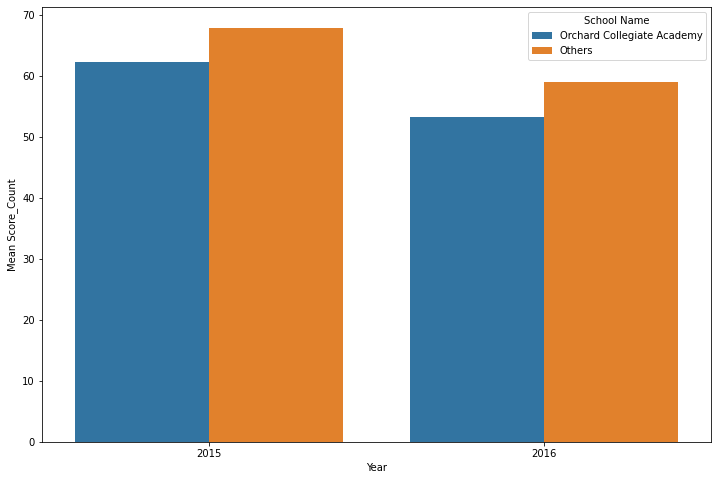

In [210]:
# setting the dimensions of the plot
# Plotting bar graph
fig,  ax = plt.subplots(figsize=(12,8))
BarPlot = sns.barplot(data=DataFrame,x="Year",y="Mean Score_Count",hue="School Name");


## **`5. Conclusion`**
_____
Based on the analysis we can see that Orchad Collegiate Academy has under performed in High school level English exam compared to average performance in all the other schools. 
____


### `End of Notebook`